***
***
# <div align="center"><font color='BLUE'><b>AREEBA FATAH </b></font></div>
***
# <div align="center"><font color='BLUE'><b>GENERATIVE AI</b></font></div>
***
# <div align="center"><font color='indigo'><b>21I-0349</b></font></div>
***
# <div align="center"><font color='BLUE'><b>ASSIGNMENT 3</b></font></div>
***
# <div align="center"><font color='BLUE'><b>Task 2 CIFAR CLASSIFICATION </b></font></div>
***
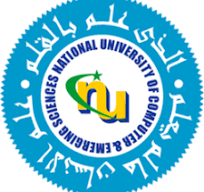

# STEP 1: IMPORTING THE REQUIRED LIBRARIES

In [2]:
import torch
import time
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import models
from torch.optim import Adam
from torch.optim.lr_scheduler import CosineAnnealingLR

# STEP 2 : DATA READING AND PREPROCESSING

1. **Defining the Transformation Pipeline:**
   - Appling data augmentation techniques such as:
     - `RandomHorizontalFlip`
     - `RandomCrop` 
   - Converting images to tensors using 
   - Normalizing image data to a range of `[-1, 1]` using `Normalize`.

2. **Downloading and Loading CIFAR-10 Dataset:**
   - Using `torchvision.datasets.CIFAR10` to download and loading both the training and test datasets.
   - Appling the transformations to the images.

3. **Creating Data Loaders:**
   - `trainloader` for batching and shuffling training data.
   - `testloader` for batching test data without shuffling.
   - Batch size here is 64


In [20]:
transform=transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32,padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
])


trainset=torchvision.datasets.CIFAR10(root='./data',train=True,download=True,transform=transform)
testset=torchvision.datasets.CIFAR10(root='./data',train=False,download=True,transform=transform)


trainloader=torch.utils.data.DataLoader(trainset,batch_size=64,shuffle=True)
testloader=torch.utils.data.DataLoader(testset,batch_size=64,shuffle=False)


Files already downloaded and verified
Files already downloaded and verified


# STEP 3 DEFINING THE SHARED FUNCTIONS


### 3.1 TRAINING AND VALIDATION
1. **Training Loop:**
   - For each epoch:
     - Setting the model to training mode.
     - Looping through the training data loader.
     - Performing the forward pass, computes loss, and updates model parameters using backpropagation.
     - Tracking cumulative training loss and accuracy.

2. **Validation Loop:**
   - After training, sets the model to evaluation mode.
   - Looping through the validation data loader.
   - Computing validation loss and accuracy without updating model parameters.

### 3.2 EVALUATION 
 **Evaluate Model:**
   - Basically getting predictions and then plotting confusion matrix and calculating accuray

### 3.3 VISUALIZATIONS
2. **Visualize Predictions:**
   - basically getting the inference on the first batch of test images.



In [7]:
def evaluate_model(model,testloader,device):
    model.eval()
    y_true=[]
    y_pred=[]
    
    with torch.no_grad():
        for data in testloader:
            inputs,labels=data
            inputs,labels=inputs.to(device),labels.to(device)
            outputs=model(inputs)
            _,predicted=torch.max(outputs,1)
            
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())
    
    print(classification_report(y_true,y_pred))
    
    cm=confusion_matrix(y_true,y_pred)
    sns.heatmap(cm,annot=True,fmt="d",cmap="Blues")
    plt.show()
    

def visualize_predictions(model,testloader,device):
    model.eval()
    dataiter=iter(testloader)
    images,labels=next(dataiter)
    
    images,labels=images.to(device),labels.to(device)
    outputs=model(images)
    _,predicted=torch.max(outputs,1)
    
    images=images.cpu()
    predicted=predicted.cpu()
    
    fig,axes=plt.subplots(1,5,figsize=(12,6))
    for i in range(5):
        axes[i].imshow(np.transpose(images[i].numpy(),(1,2,0)))
        axes[i].set_title(f'Pred: {predicted[i].item()}')
        axes[i].axis('off')
    plt.show()


In [5]:
def evaluate_model(model,testloader,device):
    model.eval()
    y_true=[]
    y_pred=[]
    
    with torch.no_grad():
        for data in testloader:
            inputs,labels=data
            inputs,labels=inputs.to(device),labels.to(device)
            outputs=model(inputs)
            _,predicted=torch.max(outputs,1)
            
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())
    
    print(classification_report(y_true,y_pred))
    
    cm=confusion_matrix(y_true,y_pred)
    sns.heatmap(cm,annot=True,fmt="d",cmap="Blues")
    plt.show()
 


In [4]:
def visualize_predictions(model,testloader,device):
    model.eval()
    dataiter=iter(testloader)
    images,labels=next(dataiter)
    
    images,labels=images.to(device),labels.to(device)
    outputs=model(images)
    _,predicted=torch.max(outputs,1)
    
    images=images.cpu()
    predicted=predicted.cpu()
    
    fig,axes=plt.subplots(1,5,figsize=(12,6))
    for i in range(5):
        axes[i].imshow(np.transpose(images[i].numpy(),(1,2,0)))
        axes[i].set_title(f'Pred: {predicted[i].item()}')
        axes[i].axis('off')
    plt.show()

### 3.4 METRICS FUNCTION
1. **For Measuring Inference Speed**

2. **Measuring Memory Usage**
 
3. **Comparing Models:**
    - That is calling them all for collective insights and better comparison


In [35]:
def measure_inference_speed(model,test_loader):
    model.eval()
    start_time=time.time()
    with torch.no_grad():
        for images,_ in test_loader:
            images=images.to(device)
            _=model(images)
    end_time=time.time()
    return end_time-start_time


def measure_memory_usage(model,batch):
    batch=batch.to(device)
    torch.cuda.reset_peak_memory_stats()
    with torch.no_grad():
        _=model(batch)
    return torch.cuda.max_memory_allocated()


def compare_models(vit_model,hybrid_model,pretrained_resnet_model,test_loader):
    models={
        "ViT":vit_model,
        "HybridCNN-MLP":hybrid_model,
        "Pretrained ResNet":pretrained_resnet_model,
    }
    results={}
    for name,model in models.items():
        print(f"Evaluating {name}...")
        start_time=time.time()
        training_time=time.time()-start_time
        inference_speed=measure_inference_speed(model,test_loader)
        memory_usage=measure_memory_usage(model,next(iter(test_loader))[0])
        results[name]={
            "Training Time":training_time,
            "Inference Speed":inference_speed,
            "Memory Usage":memory_usage,
        }
    return results

# STEP 4 MODELS
## 4.1 VIT


##### Key Components:

1. **Patch Embedding:**
 
2. **Positional Encoding:**

3. **Transformer Encoder:**


4. **Classification:**



In [6]:
class VisionTransformer(nn.Module):
    def __init__(self,num_classes=10,image_size=32,patch_size=8,embed_dim=256,num_heads=8,num_layers=12):
        super(VisionTransformer,self).__init__()
        self.patch_size=patch_size
        self.embed_dim=embed_dim
        self.patch_embedding=nn.Conv2d(in_channels=3,out_channels=embed_dim,kernel_size=patch_size,stride=patch_size)
        self.positional_encoding=nn.Parameter(torch.randn(1,(image_size//patch_size)**2,embed_dim))
        encoder_layer=nn.TransformerEncoderLayer(d_model=embed_dim,nhead=num_heads)
        self.transformer=nn.TransformerEncoder(encoder_layer,num_layers=num_layers)
        self.fc=nn.Linear(embed_dim,num_classes)

    def forward(self,x):
        x=self.patch_embedding(x)
        x=x.flatten(2).transpose(1,2)
        x+=self.positional_encoding
        x=self.transformer(x)
        x=x[:,0]
        x=self.fc(x)
        return x

Epoch [1/20], Train Loss: 2.0235, Train Acc: 24.82%, Val Loss: 2.0171, Val Acc: 25.04%
Epoch [2/20], Train Loss: 2.0203, Train Acc: 24.68%, Val Loss: 2.0178, Val Acc: 24.41%
Epoch [3/20], Train Loss: 2.0195, Train Acc: 24.80%, Val Loss: 2.0050, Val Acc: 25.25%
Epoch [4/20], Train Loss: 2.0182, Train Acc: 25.00%, Val Loss: 1.9977, Val Acc: 26.08%
Epoch [5/20], Train Loss: 2.0166, Train Acc: 25.26%, Val Loss: 1.9930, Val Acc: 25.97%
Epoch [6/20], Train Loss: 2.0099, Train Acc: 25.29%, Val Loss: 1.9917, Val Acc: 26.08%
Epoch [7/20], Train Loss: 2.0088, Train Acc: 25.64%, Val Loss: 1.9958, Val Acc: 26.30%
Epoch [8/20], Train Loss: 2.0077, Train Acc: 25.53%, Val Loss: 1.9892, Val Acc: 26.16%
Epoch [9/20], Train Loss: 2.0058, Train Acc: 25.57%, Val Loss: 1.9914, Val Acc: 26.59%
Epoch [10/20], Train Loss: 1.9993, Train Acc: 26.21%, Val Loss: 1.9795, Val Acc: 26.47%
Epoch [11/20], Train Loss: 2.0007, Train Acc: 25.88%, Val Loss: 1.9844, Val Acc: 26.49%
Epoch [12/20], Train Loss: 1.9933, Train 

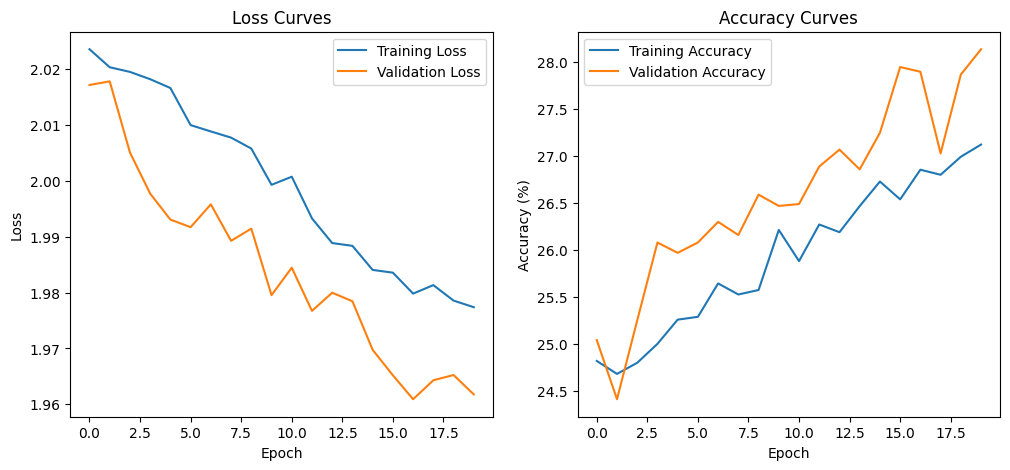

In [25]:
device=torch.device("cuda"if torch.cuda.is_available()else"cpu")
model=VisionTransformer(num_classes=10).to(device)
optimizer=Adam(model.parameters(),lr=0.0001,weight_decay=1e-4)
scheduler=CosineAnnealingLR(optimizer,T_max=20,eta_min=1e-5)
criterion=nn.CrossEntropyLoss()
train_model(model,trainloader,testloader,optimizer,criterion,scheduler,num_epochs=20)

## 4.2 Hybrid (CNN-MLP) Model

##### Key Components:

1. **CNN Layers:**

2. **MLP Layers:**

HybridCNNMLP(
  (cnn): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (mlp): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=4096, out_features=256, bias=True)
    (2): ReLU()
    (3): Linear(in_features=256, out_features=10, bias=True)
  )
)
Epoch [1/20], Train Loss: 2.3032, Train Acc: 11.39%, Val Loss: 2.3030, Val Acc: 11.68%
Epoch [2/20], Train Loss: 2.3032, Train Acc: 11.56%, Val Loss: 2.3034, Val Acc: 11.46%
Epoch [3/20], Train Loss: 2.3032, Train Acc: 11.50%, Val Loss: 2.3034, Val Acc: 11.92%
Epoch [4/20], Train Loss: 2.3031, Train Acc: 11.43%, Val Loss: 2.3034, Val Acc: 11.36%
Epoch [5/20], Train Loss: 2.3033, Train Acc: 11.70%, Va

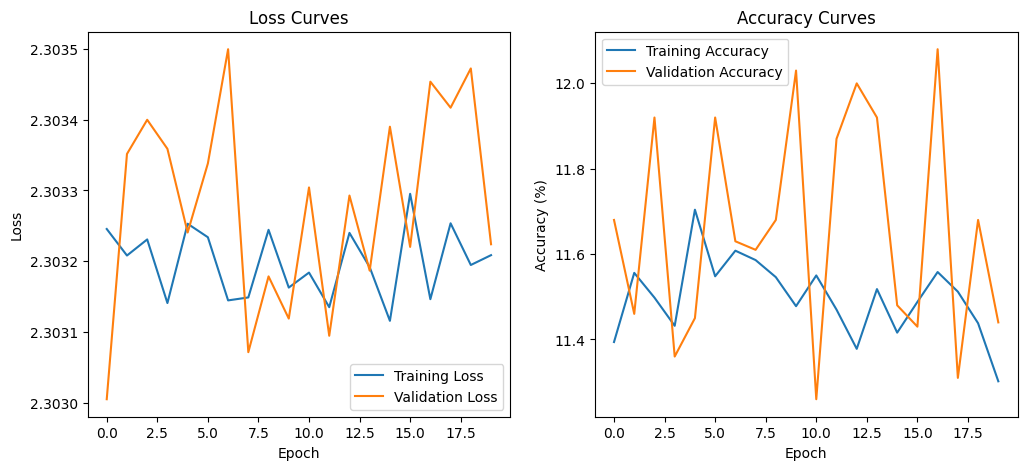

In [26]:
class HybridCNNMLP(nn.Module):
    def __init__(self,num_classes=10):
        super(HybridCNNMLP,self).__init__()
        self.cnn=nn.Sequential(
            nn.Conv2d(3,32,kernel_size=3,stride=1,padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            nn.Conv2d(32,64,kernel_size=3,stride=1,padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
        )
        self.mlp=nn.Sequential(
            nn.Flatten(),
            nn.Linear(64*8*8,256),
            nn.ReLU(),
            nn.Linear(256,num_classes)
        )
    
    def forward(self,x):
        x=self.cnn(x)
        return self.mlp(x)

cnn_mlp_model=HybridCNNMLP().to(device)
print(cnn_mlp_model)

cnn_mlp_optimizer=optim.Adam(cnn_mlp_model.parameters(),lr=0.001)
cnn_mlp_criterion=nn.CrossEntropyLoss()
train_model(cnn_mlp_model,trainloader,testloader,optimizer,criterion,scheduler,num_epochs=20)


## 4.3 Resnet


##### Key Components:

1. **Using a Pretrained ResNet18:**


2. **Freezing the Pretrained Layers:**


3. **Replacing the Final Classification Layer:**



In [27]:
class PretrainedResNet(nn.Module):
    def __init__(self,num_classes=10):
        super(PretrainedResNet,self).__init__()
        self.resnet=models.resnet18(pretrained=True)
        for param in self.resnet.parameters():
            param.requires_grad=False
        num_features=self.resnet.fc.in_features
        self.resnet.fc=nn.Linear(num_features,num_classes)

    def forward(self,x):
        return self.resnet(x)

resnet=PretrainedResNet().to(device)

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/20], Train Loss: 2.5452, Train Acc: 10.34%, Val Loss: 2.5592, Val Acc: 10.37%
Epoch [2/20], Train Loss: 2.5447, Train Acc: 10.29%, Val Loss: 2.5727, Val Acc: 10.36%
Epoch [3/20], Train Loss: 2.5436, Train Acc: 10.28%, Val Loss: 2.5877, Val Acc: 10.35%
Epoch [4/20], Train Loss: 2.5396, Train Acc: 10.28%, Val Loss: 2.5963, Val Acc: 10.13%
Epoch [5/20], Train Loss: 2.5469, Train Acc: 10.12%, Val Loss: 2.5761, Val Acc: 10.71%
Epoch [6/20], Train Loss: 2.5466, Train Acc: 10.40%, Val Loss: 2.5979, Val Acc: 9.83%
Epoch [7/20], Train Loss: 2.5469, Train Acc: 10.35%, Val Loss: 2.5927, Val Acc: 10.28%
Epoch [8/20], Train Loss: 2.5464, Train Acc: 10.19%, Val Loss: 2.5837, Val Acc: 10.88%
Epoch [9/20], Train Loss: 2.5458, Train Acc: 10.35%, Val Loss: 2.6013, Val Acc: 10.05%
Epoch [10/20], Train Loss: 2.5473, Train Acc: 10.15%, Val Loss: 2.5843, Val Acc: 10.12%
Epoch [11/20], Train Loss: 2.5481, Train Acc: 10.14%, Val Loss: 2.5841, Val Acc: 10.61%
Epoch [12/20], Train Loss: 2.5471, Train A

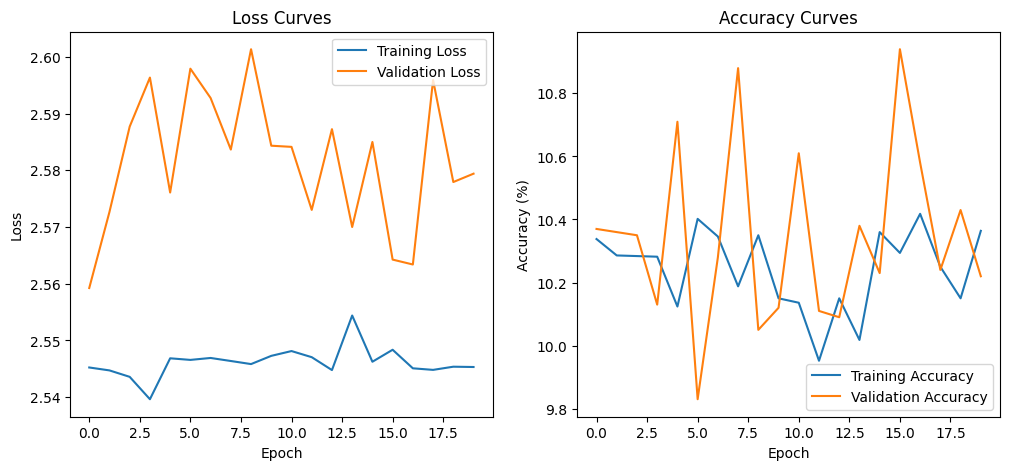

In [29]:
train_model(resnet, trainloader, testloader, optimizer, criterion, scheduler, num_epochs=20)

# STEP 5 SAVING MODELS AND EVALUATIONS

## 5.1 SAVING MODELS

In [30]:
torch.save(model.state_dict(), '/kaggle/working/vit_model.pth')
torch.save(cnn_mlp_model.state_dict(), '/kaggle/working/hybrid_model.pth')
torch.save(resnet.state_dict(), '/kaggle/working/resnet_model.pth')

# 5.2 Visualizations

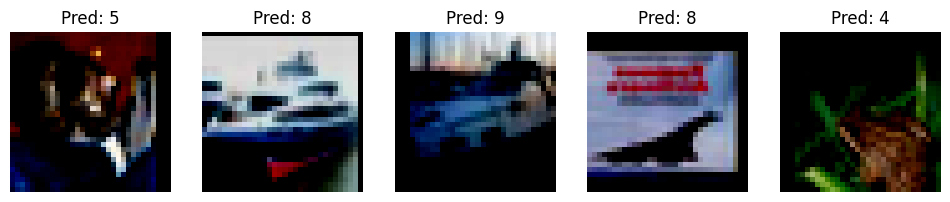

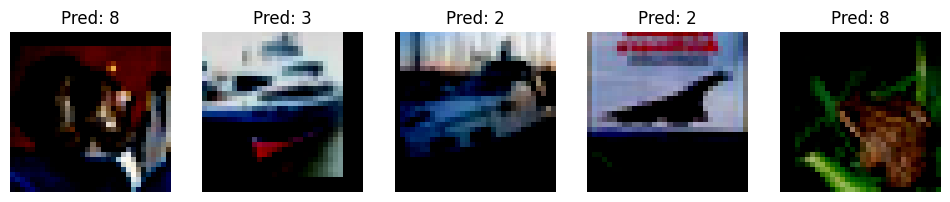

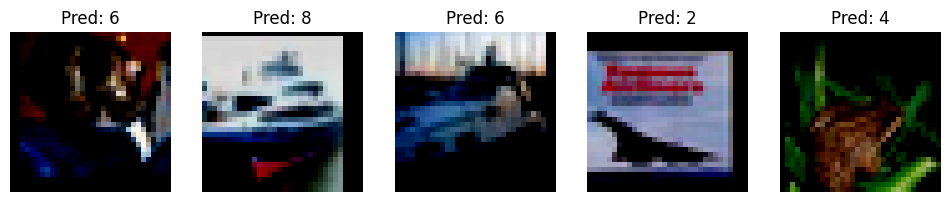

In [31]:
visualize_predictions(model, testloader, device)
visualize_predictions(cnn_mlp_model, testloader, device)
visualize_predictions(resnet, testloader, device)

              precision    recall  f1-score   support

           0       0.33      0.25      0.29      1000
           1       0.26      0.20      0.22      1000
           2       0.26      0.21      0.23      1000
           3       0.21      0.21      0.21      1000
           4       0.25      0.27      0.26      1000
           5       0.26      0.19      0.22      1000
           6       0.26      0.36      0.30      1000
           7       0.24      0.18      0.21      1000
           8       0.31      0.47      0.38      1000
           9       0.28      0.35      0.31      1000

    accuracy                           0.27     10000
   macro avg       0.27      0.27      0.26     10000
weighted avg       0.27      0.27      0.26     10000



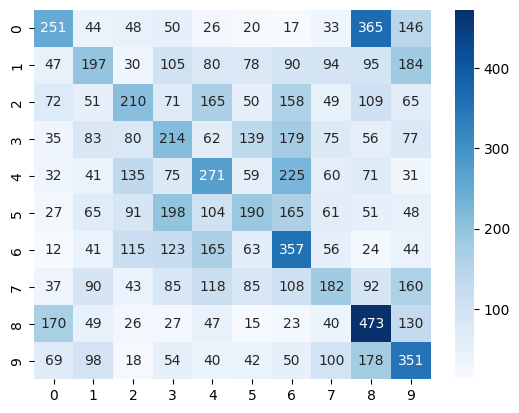

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1000
           1       0.00      0.00      0.00      1000
           2       0.10      0.25      0.14      1000
           3       0.05      0.02      0.02      1000
           4       0.03      0.00      0.00      1000
           5       0.00      0.00      0.00      1000
           6       0.16      0.40      0.23      1000
           7       0.00      0.00      0.00      1000
           8       0.11      0.49      0.18      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.12     10000
   macro avg       0.04      0.12      0.06     10000
weighted avg       0.04      0.12      0.06     10000



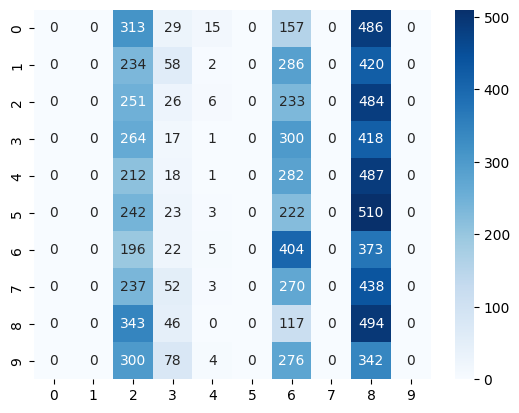

              precision    recall  f1-score   support

           0       0.13      0.18      0.15      1000
           1       0.13      0.07      0.09      1000
           2       0.06      0.03      0.04      1000
           3       0.11      0.07      0.08      1000
           4       0.11      0.11      0.11      1000
           5       0.10      0.11      0.10      1000
           6       0.10      0.21      0.14      1000
           7       0.07      0.02      0.03      1000
           8       0.09      0.15      0.11      1000
           9       0.11      0.08      0.09      1000

    accuracy                           0.10     10000
   macro avg       0.10      0.10      0.10     10000
weighted avg       0.10      0.10      0.10     10000



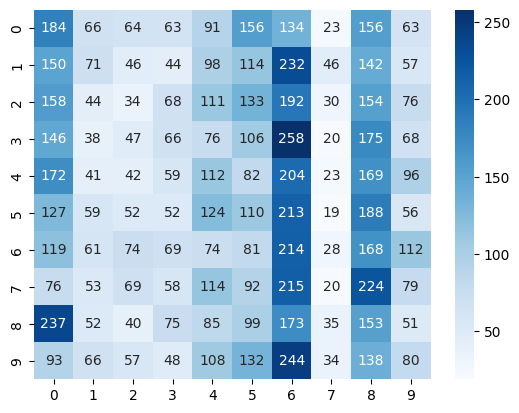

In [32]:
evaluate_model(model, testloader, device)
evaluate_model(cnn_mlp_model, testloader, device)
evaluate_model(resnet, testloader, device)


## 5.3 COMPARISON

In [36]:
compare_models(model, cnn_mlp_model, resnet, testloader)

Evaluating ViT...
Evaluating HybridCNN-MLP...
Evaluating Pretrained ResNet...


{'ViT': {'Training Time': 4.76837158203125e-07,
  'Inference Speed': 4.903910160064697,
  'Memory Usage': 289164288},
 'HybridCNN-MLP': {'Training Time': 7.152557373046875e-07,
  'Inference Speed': 3.9895265102386475,
  'Memory Usage': 286018560},
 'Pretrained ResNet': {'Training Time': 9.5367431640625e-07,
  'Inference Speed': 4.306933879852295,
  'Memory Usage': 284707840}}

# END